In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

Reading the train data:

In [2]:
train = pd.read_csv('Data/Raw/train.csv')

In [3]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


Changes to be made:
Dummy variables or factorizing for Product_ID, Gender, City_Category and Ages.

Checking for missing data:

In [4]:
null_values = pd.DataFrame(pd.isnull(train).any())
null_values['Sum'] = pd.isnull(train).sum()
null_values

,0,Sum
User_ID,False,0
Product_ID,False,0
Gender,False,0
Age,False,0
Occupation,False,0
City_Category,False,0
Stay_In_Current_City_Years,False,0
Marital_Status,False,0
Product_Category_1,False,0
Product_Category_2,True,173638


Because the missing data is from categories, it may be important to keep it for the analysis, so the null values are going to be replaced by 0.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.fillna(0,inplace=True)

In [7]:
train['Product_ID'] = pd.factorize(train['Product_ID'])[0]

In [8]:
## Product_ID, Gender, City_Category and Ages
train['Age'] = pd.factorize(train['Age'])[0]
train['Gender'] = pd.factorize(train['Gender'])[0]
train['City_Category'] = pd.factorize(train['City_Category'])[0]

In [9]:
train['Stay_In_Current_City_Years'] = pd.factorize(train['Stay_In_Current_City_Years'])[0]

In [10]:
train.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,0,10,0,0,0,3,0.0,0.0,8370
1,1000001,1,0,0,10,0,0,0,1,6.0,14.0,15200
2,1000001,2,0,0,10,0,0,0,12,0.0,0.0,1422
3,1000001,3,0,0,10,0,0,0,12,14.0,0.0,1057
4,1000002,4,1,1,16,1,1,0,8,0.0,0.0,7969
5,1000003,5,1,2,15,0,2,0,1,2.0,0.0,15227
6,1000004,6,1,3,7,2,0,1,1,8.0,17.0,19215
7,1000004,7,1,3,7,2,0,1,1,15.0,0.0,15854
8,1000004,8,1,3,7,2,0,1,1,16.0,0.0,15686
9,1000005,9,1,2,20,0,3,1,8,0.0,0.0,7871


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int64
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


Because the User_ID is a unique number is not related to the "Purchase" variable, so it is discarded.

In [12]:
train.drop('User_ID', axis=1,inplace=True)

Now cleaning the test data:

In [13]:
test = pd.read_csv('Data/Raw/test.csv')
test.fillna(0,inplace=True)
dfp =  pd.read_csv('Data/Raw/test.csv')
test['Age'] = pd.factorize(test['Age'])[0]
test['Gender'] = pd.factorize(test['Gender'])[0]
test['City_Category'] = pd.factorize(test['City_Category'])[0]
test['Product_ID'] = pd.factorize(test['Product_ID'])[0]
test['Stay_In_Current_City_Years'] = pd.factorize(test['Stay_In_Current_City_Years'])[0]

In [14]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,0,0,0,7,0,0,1,1,11.0,0.0
1,1000009,1,0,1,17,1,1,0,3,5.0,0.0
2,1000010,2,1,2,1,0,2,1,5,14.0,0.0
3,1000010,3,1,2,1,0,2,1,4,9.0,0.0
4,1000011,4,1,1,1,1,3,0,4,5.0,12.0


In [15]:
train.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Standardization of the variables:

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_train = scaler.fit_transform(train.drop('Purchase',axis=1))
scaled_train = pd.DataFrame(scaled_train,columns=['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'])

In [17]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,10,0,0,0,3,0.0,0.0,8370
1,1,0,0,10,0,0,0,1,6.0,14.0,15200
2,2,0,0,10,0,0,0,12,0.0,0.0,1422
3,3,0,0,10,0,0,0,12,14.0,0.0,1057
4,4,1,1,16,1,1,0,8,0.0,0.0,7969


In [18]:
scaled_train['Purchase'] = train['Purchase']

In [19]:
scaled_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,-1.206367,-1.746513,-1.962452,0.294864,-1.411480,-1.573720,-0.833018,-0.610809,-1.083654,-0.614641,8370
1,-1.205077,-1.746513,-1.962452,0.294864,-1.411480,-1.573720,-0.833018,-1.118912,-0.118323,1.625106,15200
2,-1.203788,-1.746513,-1.962452,0.294864,-1.411480,-1.573720,-0.833018,1.675656,-1.083654,-0.614641,1422
3,-1.202499,-1.746513,-1.962452,0.294864,-1.411480,-1.573720,-0.833018,1.675656,1.168785,-0.614641,1057
4,-1.201210,0.572570,-1.394247,1.214734,-0.185933,-0.823816,-0.833018,0.659449,-1.083654,-0.614641,7969


In [20]:
X = scaled_train.drop('Purchase',axis=1)
y = scaled_train['Purchase']

In [21]:
param_grid = {'n_estimators': [200,700],'max_features': ['auto', 'sqrt', 'log2']}


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
grfr= GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
grfr.fit(X_train,y_train)
predictions = grfr.predict(X_test)
plt.scatter(y_test,predictions)

JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\Jose\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\Jose\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000025EDB7CA420, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Jose\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\J...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000025EDB7CA420, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\Jose\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\J...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 5, 2, 50, 15, 191381, tzinfo=tzutc()), 'msg_id': 'E6DC88E200114EA38B47154348014013', 'msg_type': 'execute_request', 'session': '1D11A88A544942BE89E36A2306C37E4F', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'E6DC88E200114EA38B47154348014013', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1D11A88A544942BE89E36A2306C37E4F']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 5, 2, 50, 15, 191381, tzinfo=tzutc()), 'msg_id': 'E6DC88E200114EA38B47154348014013', 'msg_type': 'execute_request', 'session': '1D11A88A544942BE89E36A2306C37E4F', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'E6DC88E200114EA38B47154348014013', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1D11A88A544942BE89E36A2306C37E4F'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 5, 2, 50, 15, 191381, tzinfo=tzutc()), 'msg_id': 'E6DC88E200114EA38B47154348014013', 'msg_type': 'execute_request', 'session': '1D11A88A544942BE89E36A2306C37E4F', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'E6DC88E200114EA38B47154348014013', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import train_test_s...r.predict(X_test)\nplt.scatter(y_test,predictions)', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-22-b13c028aa5ee>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 25ee3182898, executio..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000025EDF6CC150, file "<ipython-input-22-b13c028aa5ee>", line 7>
        result = <ExecutionResult object at 25ee3182898, executio..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000025EDF6CC150, file "<ipython-input-22-b13c028aa5ee>", line 7>, result=<ExecutionResult object at 25ee3182898, executio..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000025EDF6CC150, file "<ipython-input-22-b13c028aa5ee>", line 7>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ma...magic('matplotlib inline')\nsns.set_style('white')", "train = pd.read_csv('Data/Raw/train.csv')", 'train.head(10)', "null_values = pd.DataFrame(pd.isnull(train).any(...alues['Sum'] = pd.isnull(train).sum()\nnull_values", 'train.info()', 'train.fillna(0,inplace=True)', "train['Product_ID'] = pd.factorize(train['Product_ID'])[0]", "## Product_ID, Gender, City_Category and Ages\ntr...egory'] = pd.factorize(train['City_Category'])[0]", "train['Stay_In_Current_City_Years'] = pd.factorize(train['Stay_In_Current_City_Years'])[0]", 'train.head(20)', 'train.info()', "train.drop('User_ID', axis=1,inplace=True)", "test = pd.read_csv('Data/Raw/test.csv')\ntest.fil....factorize(test['Stay_In_Current_City_Years'])[0]", 'test.head()', 'train.columns', "from sklearn import preprocessing\nscaler = prepr...     'Product_Category_2', 'Product_Category_3'])", 'train.head()', "scaled_train['Purchase'] = train['Purchase']", 'scaled_train.head()', ...], 'Out': {3:    User_ID Product_ID Gender    Age  Occupation ...              0.0                 0.0      7871  , 4:                                 0     Sum
User_I... 383247
Purchase                    False       0, 10:     User_ID  Product_ID  Gender  Age  Occupation...              5.0                15.0     19614  , 14:    User_ID  Product_ID  Gender  Age  Occupation ...0.0  
4                 5.0                12.0  , 15: Index(['Product_ID', 'Gender', 'Age', 'Occupatio...t_Category_3', 'Purchase'],
      dtype='object'), 17:    Product_ID  Gender  Age  Occupation  City_Cat...              0.0                 0.0      7969  , 19:    Product_ID    Gender       Age  Occupation  C...        -1.083654           -0.614641      7969  }, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X':         Product_ID    Gender       Age  Occupati...          -0.614641  

[550068 rows x 10 columns], 'X_test':         Product_ID    Gender       Age  Occupati...          -0.614641  

[165021 rows x 10 columns], 'X_train':         Product_ID    Gender       Age  Occupati...          -0.614641  

[385047 rows x 10 columns], '_':    Product_ID    Gender       Age  Occupation  C...        -1.083654           -0.614641      7969  , '_10':     User_ID  Product_ID  Gender  Age  Occupation...              5.0                15.0     19614  , '_14':    User_ID  Product_ID  Gender  Age  Occupation ...0.0  
4                 5.0                12.0  , ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ma...magic('matplotlib inline')\nsns.set_style('white')", "train = pd.read_csv('Data/Raw/train.csv')", 'train.head(10)', "null_values = pd.DataFrame(pd.isnull(train).any(...alues['Sum'] = pd.isnull(train).sum()\nnull_values", 'train.info()', 'train.fillna(0,inplace=True)', "train['Product_ID'] = pd.factorize(train['Product_ID'])[0]", "## Product_ID, Gender, City_Category and Ages\ntr...egory'] = pd.factorize(train['City_Category'])[0]", "train['Stay_In_Current_City_Years'] = pd.factorize(train['Stay_In_Current_City_Years'])[0]", 'train.head(20)', 'train.info()', "train.drop('User_ID', axis=1,inplace=True)", "test = pd.read_csv('Data/Raw/test.csv')\ntest.fil....factorize(test['Stay_In_Current_City_Years'])[0]", 'test.head()', 'train.columns', "from sklearn import preprocessing\nscaler = prepr...     'Product_Category_2', 'Product_Category_3'])", 'train.head()', "scaled_train['Purchase'] = train['Purchase']", 'scaled_train.head()', ...], 'Out': {3:    User_ID Product_ID Gender    Age  Occupation ...              0.0                 0.0      7871  , 4:                                 0     Sum
User_I... 383247
Purchase                    False       0, 10:     User_ID  Product_ID  Gender  Age  Occupation...              5.0                15.0     19614  , 14:    User_ID  Product_ID  Gender  Age  Occupation ...0.0  
4                 5.0                12.0  , 15: Index(['Product_ID', 'Gender', 'Age', 'Occupatio...t_Category_3', 'Purchase'],
      dtype='object'), 17:    Product_ID  Gender  Age  Occupation  City_Cat...              0.0                 0.0      7969  , 19:    Product_ID    Gender       Age  Occupation  C...        -1.083654           -0.614641      7969  }, 'RandomForestRegressor': <class 'sklearn.ensemble.forest.RandomForestRegressor'>, 'X':         Product_ID    Gender       Age  Occupati...          -0.614641  

[550068 rows x 10 columns], 'X_test':         Product_ID    Gender       Age  Occupati...          -0.614641  

[165021 rows x 10 columns], 'X_train':         Product_ID    Gender       Age  Occupati...          -0.614641  

[385047 rows x 10 columns], '_':    Product_ID    Gender       Age  Occupation  C...        -1.083654           -0.614641      7969  , '_10':     User_ID  Product_ID  Gender  Age  Occupation...              5.0                15.0     19614  , '_14':    User_ID  Product_ID  Gender  Age  Occupation ...0.0  
4                 5.0                12.0  , ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
C:\Users\Jose\Desktop\Python\GitHub\ML\Black Friday\<ipython-input-22-b13c028aa5ee> in <module>()
      2 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
      3 from sklearn.ensemble import RandomForestRegressor
      4 from sklearn.model_selection import GridSearchCV
      5 rfr = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
      6 grfr= GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
----> 7 grfr.fit(X_train,y_train)
      8 predictions = grfr.predict(X_test)
      9 plt.scatter(y_test,predictions)

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e...train_score=True,
       scoring=None, verbose=0), X=        Product_ID    Gender       Age  Occupati...          -0.614641  

[385047 rows x 10 columns], y=25652      7757
468325     2008
447        6986
...5157
Name: Purchase, Length: 385047, dtype: int64, groups=None, **fit_params={})
    633                                   return_train_score=self.return_train_score,
    634                                   return_n_test_samples=True,
    635                                   return_times=True, return_parameters=False,
    636                                   error_score=self.error_score)
    637           for parameters, (train, test) in product(candidate_params,
--> 638                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>
        X =         Product_ID    Gender       Age  Occupati...          -0.614641  

[385047 rows x 10 columns]
        y = 25652      7757
468325     2008
447        6986
...5157
Name: Purchase, Length: 385047, dtype: int64
        groups = None
    639 
    640         # if one choose to see train score, "out" will contain train score info
    641         if self.return_train_score:
    642             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=1)>
        iterator = <generator object BaseSearchCV.fit.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in dispatch_one_batch(self=Parallel(n_jobs=1), iterator=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=1)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in _dispatch(self=Parallel(n_jobs=1), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),         Product_ID    Gender       Age  Occupati...          -0.614641  

[385047 rows x 10 columns], 25652      7757
468325     2008
447        6986
...5157
Name: Purchase, Length: 385047, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 77010,  77011,  77012, ..., 385044, 385045, 385046]), array([    0,     1,     2, ..., 77007, 77008, 77009]), 0, {'max_features': 'auto', 'n_estimators': 700}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False),         Product_ID    Gender       Age  Occupati...          -0.614641  

[385047 rows x 10 columns], 25652      7757
468325     2008
447        6986
...5157
Name: Purchase, Length: 385047, dtype: int64, {'score': <function _passthrough_scorer>}, array([ 77010,  77011,  77012, ..., 385044, 385045, 385046]), array([    0,     1,     2, ..., 77007, 77008, 77009]), 0, {'max_features': 'auto', 'n_estimators': 700})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=        Product_ID    Gender       Age  Occupati...          -0.614641  

[385047 rows x 10 columns], y=25652      7757
468325     2008
447        6986
...5157
Name: Purchase, Length: 385047, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([ 77010,  77011,  77012, ..., 385044, 385045, 385046]), test=array([    0,     1,     2, ..., 77007, 77008, 77009]), verbose=0, parameters={'max_features': 'auto', 'n_estimators': 700}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    432 
    433     try:
    434         if y_train is None:
    435             estimator.fit(X_train, **fit_params)
    436         else:
--> 437             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestRegr... random_state=None, verbose=0, warm_start=False)>
        X_train =         Product_ID    Gender       Age  Occupati...          -0.614641  

[308037 rows x 10 columns]
        y_train = 350530     7163
194663     6805
384472     5431
...5157
Name: Purchase, Length: 308037, dtype: int64
        fit_params = {}
    438 
    439     except Exception as e:
    440         # Note fit time as time until error
    441         fit_time = time.time() - start_time

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32), y=array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]]), sample_weight=None)
    322             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    323                              backend="threading")(
    324                 delayed(_parallel_build_trees)(
    325                     t, self, X, y, sample_weight, i, len(trees),
    326                     verbose=self.verbose, class_weight=self.class_weight)
--> 327                 for i, t in enumerate(trees))
        i = 699
    328 
    329             # Collect newly grown trees
    330             self.estimators_.extend(trees)
    331 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Thu Jan  4 23:01:54 2018
PID: 8028                  Python 3.6.2: C:\Users\Jose\Anaconda3\python.exe
...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1788599677, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32), array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]]), None, 501, 700), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1788599677, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32), array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]]), None, 501, 700)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py in _parallel_build_trees(tree=DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1788599677, splitter='best'), forest=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32), y=array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]]), sample_weight=None, tree_idx=501, n_trees=700, verbose=0, class_weight=None)
    115                 warnings.simplefilter('ignore', DeprecationWarning)
    116                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    117         elif class_weight == 'balanced_subsample':
    118             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    119 
--> 120         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Decis...False, random_state=1788599677, splitter='best')>
        X = array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32)
        y = array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]])
        sample_weight = None
        curr_sample_weight = array([ 2.,  2.,  1., ...,  1.,  1.,  0.])
    121     else:
    122         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    123 
    124     return tree

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1788599677, splitter='best'), X=array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32), y=array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]]), sample_weight=array([ 2.,  2.,  1., ...,  1.,  1.,  0.]), check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\tree\tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1788599677, splitter='best'), X=array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32), y=array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]]), sample_weight=array([ 2.,  2.,  1., ...,  1.,  1.,  0.]), check_input=False, X_idx_sorted=None)
    357                                            max_depth,
    358                                            max_leaf_nodes,
    359                                            self.min_impurity_decrease,
    360                                            min_impurity_split)
    361 
--> 362         builder.build(self.tree_, X, y, sample_weight, X_idx_sorted)
        builder.build = <built-in method build of sklearn.tree._tree.DepthFirstTreeBuilder object>
        self.tree_ = <sklearn.tree._tree.Tree object>
        X = array([[ 1.51906228,  0.57256961, -0.25783622, ....       -1.08365405, -0.61464113]], dtype=float32)
        y = array([[ 7163.],
       [ 6805.],
       [ 5431....     [ 8073.],
       [ 7846.],
       [ 5157.]])
        sample_weight = array([ 2.,  2.,  1., ...,  1.,  1.,  0.])
        X_idx_sorted = None
    363 
    364         if self.n_outputs_ == 1:
    365             self.n_classes_ = self.n_classes_[0]
    366             self.classes_ = self.classes_[0]

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.DepthFirstTreeBuilder.build()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._add_node()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\tree\_tree.cp36-win_amd64.pyd in sklearn.tree._tree.Tree._resize_c()

...........................................................................
C:\Users\Jose\Anaconda3\lib\site-packages\sklearn\tree\_utils.cp36-win_amd64.pyd in sklearn.tree._utils.safe_realloc()

MemoryError: could not allocate 29360128 bytes
___________________________________________________________________________

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R^2:',metrics.explained_variance_score(y_test,predictions))

In [ ]:
X_train = scaled_train.drop('Purchase',axis=1)
y_train = scaled_train['Purchase']
test = test.drop('User_ID',axis=1)


In [36]:
test.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,0,7,0,0,1,1,11.0,0.0
1,1,0,1,17,1,1,0,3,5.0,0.0
2,2,1,2,1,0,2,1,5,14.0,0.0
3,3,1,2,1,0,2,1,4,9.0,0.0
4,4,1,1,1,1,3,0,4,5.0,12.0


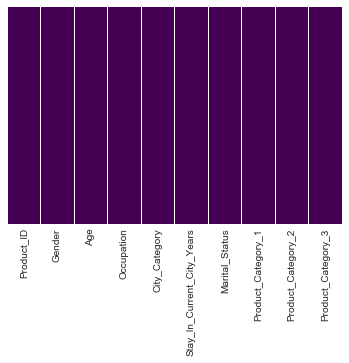

In [37]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
scaled_test = scaler.fit_transform(test)
scaled_test = pd.DataFrame(scaled_test,columns=['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'])
X_test = scaled_test


In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,verbose=3)
rfr.fit(X_train,y_train)
predictions = rfr.predict(X_test)

building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


building tree 2 of 200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  8.6min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   22.1s finished


In [40]:
df = pd.DataFrame(dfp['User_ID'])
df['Product_ID']=dfp['Product_ID']
df['Purchase']=predictions
df.to_csv("data/results/Submission Simple LR.csv", encoding='utf-8', index=False)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_test = test.drop('User_ID',axis=1)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lm.coef_

array([  -0.93567218,  465.07794587,   -4.1804152 ,    8.76836406,
         31.03161365,  -12.5439276 ,   70.45580962, -299.78912779,
          5.13779719,  133.40170767])

In [53]:
predictions = lm.predict(X_test)

In [20]:
predictions

NameError: name 'predictions' is not defined

In [67]:
df = pd.DataFrame(dfp['User_ID'])
df['Product_ID']=dfp['Product_ID']
df['Purchase']=predictions
df.to_csv("data/results/Submission Simple LR.csv", encoding='utf-8', index=False)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013,P00350442,M,46-50,1,C,3,1,2,3.0,15.0
6,1000013,P00155442,M,46-50,1,C,3,1,1,11.0,15.0
7,1000013,P0094542,M,46-50,1,C,3,1,2,4.0,9.0
8,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN
